# BMW Pricing Challenge %77 True Prediction

Hi everybody ! Estimating the value of a used car is quite difficult. By basing on BMW used car dataset, I created a model. It was enjoyable a study for me. I hope you enjoy it. I'm wating that you write your all ideas. If it benefits for you, please, don't forget to upvote ! 

## Have A Fun

# CONTENT

[1.Exploratory Data Analysis <br/>](#1)
[2.Cleaning Data <br/>](#2)
[3.Prediction<br/>](#3)
[4.Evaluation Regression Models <br/>](#4)


<a id="1"></a>
## Exploratory Data Analysis

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

#data visualization
import seaborn as sns
import matplotlib.pyplot as plt

#predict library
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split 

import os
print(os.listdir("../input"))

['bmw_pricing_challenge.csv']


In [2]:
#read data
data = pd.read_csv('../input/bmw_pricing_challenge.csv')

In [3]:
price = data['price']
m_key = data['model_key']
data.drop(['price'],axis=1,inplace=True)
data.head()

,maker_key,model_key,mileage,engine_power,registration_date,fuel,paint_color,car_type,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,sold_at
0,BMW,118,140411,100,2012-02-01,diesel,black,convertible,True,True,False,False,True,True,True,False,2018-01-01
1,BMW,M4,13929,317,2016-04-01,petrol,grey,convertible,True,True,False,False,False,True,True,True,2018-02-01
2,BMW,320,183297,120,2012-04-01,diesel,white,convertible,False,False,False,False,True,False,True,False,2018-02-01
3,BMW,420,128035,135,2014-07-01,diesel,red,convertible,True,True,False,False,True,True,True,True,2018-02-01
4,BMW,425,97097,160,2014-12-01,diesel,silver,convertible,True,True,False,False,False,True,True,True,2018-04-01


### Engine Power according to Model Visualization

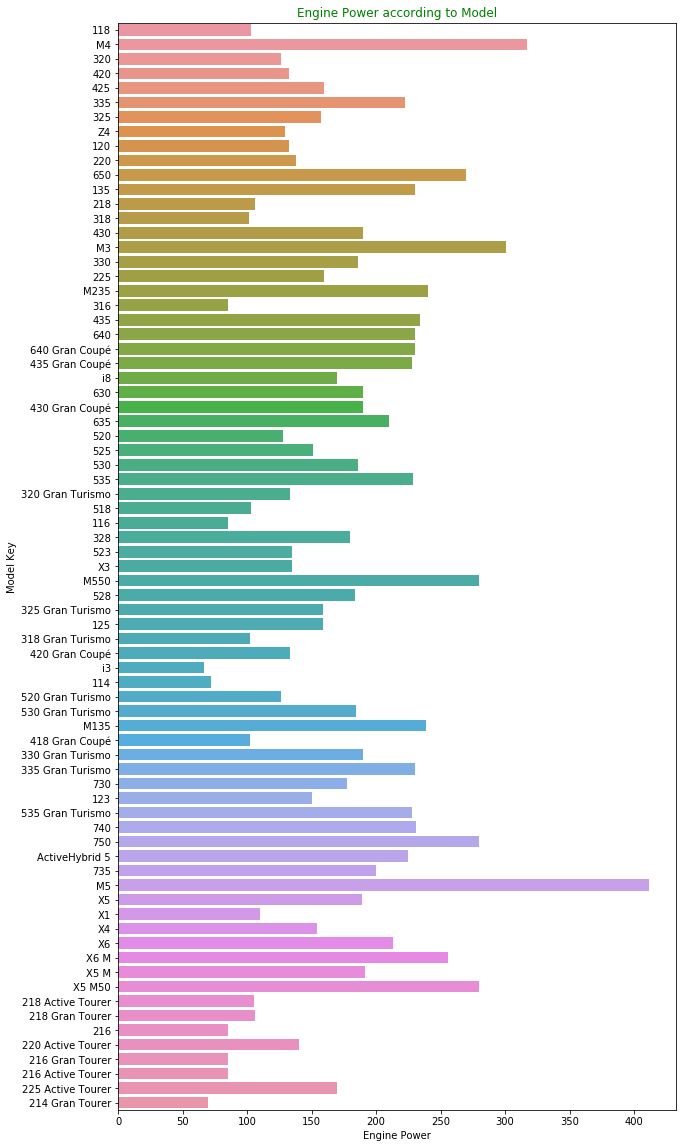

In [4]:
model_key = data['model_key'].unique()
engine_power = []
for each in model_key:
    x = data[data['model_key']==each]
    engine_power.append(sum(x['engine_power']/len(x)))

plt.figure(figsize=(10,20))
sns.barplot(x=engine_power,y=model_key)
plt.xlabel("Engine Power")
plt.ylabel("Model Key")
plt.title("Engine Power according to Model", color="green")
plt.show()

### Mileage Visualization

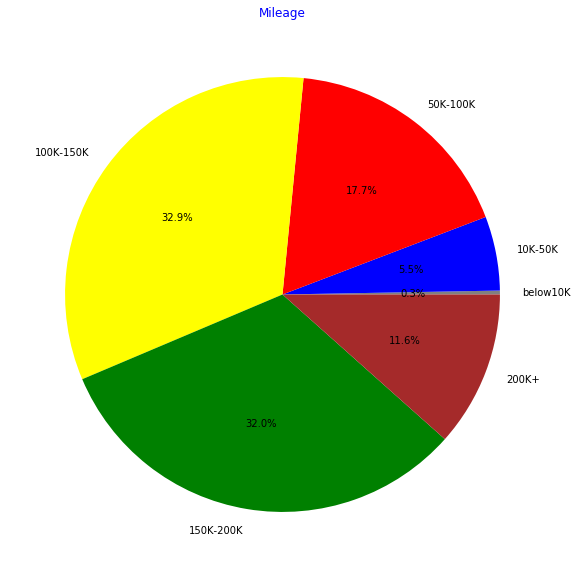

In [5]:
mileage = []
labels = ['below10K','10K-50K','50K-100K','100K-150K','150K-200K','200K+']
colors = ['grey','blue','red','yellow','green','brown']
explode = [0,0,0,0,0,0]
for each in range(1,21):
    each = each*10000
    if(each==10000):
        x = data[data['mileage']<10000]
        mileage.append(len(x))
    elif(each==50000):
        x = data[(data['mileage']>=10000) & (data['mileage']<50000)]
        mileage.append(len(x))
    elif(each==100000):
        x = data[(data['mileage']>=50000) & (data['mileage']<100000)]
        mileage.append(len(x))
    elif(each==150000):
        x = data[(data['mileage']>=100000) & (data['mileage']<150000)]
        mileage.append(len(x))
    elif(each==200000):
        x = data[(data['mileage']>=150000) & (data['mileage']<200000)]
        mileage.append(len(x))
        x = data[data['mileage']>=200000]
        mileage.append(len(x))
plt.figure(figsize=(10,10))
plt.pie(mileage,explode=explode, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Mileage',color="blue")
plt.show()

### Registration Date Visualization

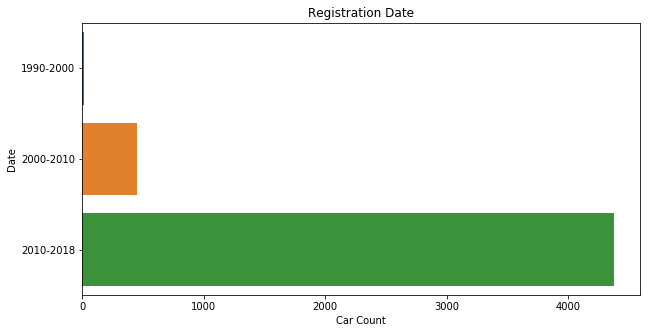

In [6]:
date = []
year = ['1990-2000',"2000-2010","2010-2018"]
for i in range(1,4):
    if (i==1):
        x = data[(data['registration_date']>="1990-03-01") & (data['registration_date']<"2000-01-01")]
        date.append(len(x))
    elif(i==2):
        x = data[(data['registration_date']>="2000-01-01") & (data['registration_date']<"2010-01-01")]
        date.append(len(x))
    elif(i==3):
        x = data[(data['registration_date']>="2010-01-01") & (data['registration_date']<"2018-01-01")]
        date.append(len(x))
plt.figure(figsize=(10,5))
sns.barplot(x=date,y=year)
plt.xlabel("Car Count")
plt.ylabel("Date")
plt.title("Registration Date")
plt.show()

### Fuel Type Visualization

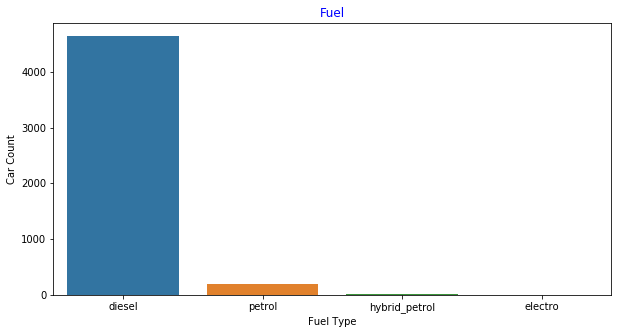

In [7]:
plt.figure(figsize=(10,5))
sns.countplot(data['fuel'])
plt.title('Fuel',color="blue")
plt.xlabel("Fuel Type")
plt.ylabel("Car Count")
plt.show()

### Color Type Visualization

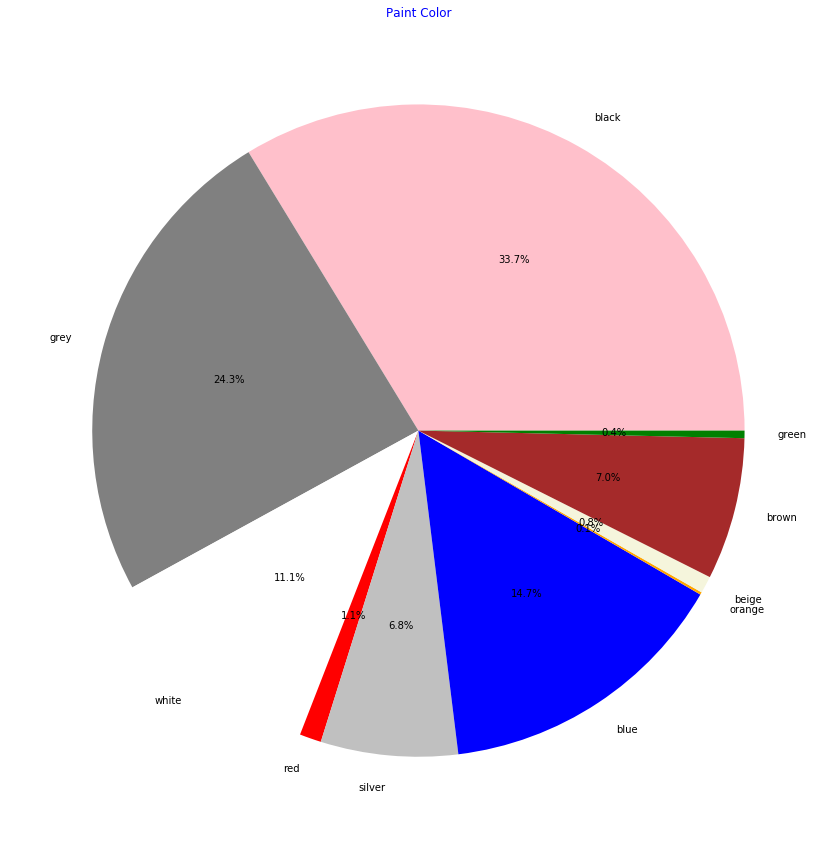

In [8]:
color = []
colors = ['pink','grey','white','red','silver','blue','orange','beige','brown','green']
colors1 = ['black','grey','white','red','silver','blue','orange','beige','brown','green']
explode = [0,0,0,0,0,0,0,0,0,0]
for i in range(1,11):
    if(i==1):
        x = data[data['paint_color']=="black"]
        color.append(len(x))
    elif(i==2):
        x = data[data['paint_color']=="grey"]
        color.append(len(x))
    elif(i==3):
        x = data[data['paint_color']=="white"]
        color.append(len(x))
    elif(i==4):
        x = data[data['paint_color']=="red"]
        color.append(len(x))
    elif(i==5):
        x = data[data['paint_color']=="silver"]
        color.append(len(x))
    elif(i==6):
        x = data[data['paint_color']=="blue"]
        color.append(len(x))
    elif(i==7):
        x = data[data['paint_color']=="orange"]
        color.append(len(x))
    elif(i==8):
        x = data[data['paint_color']=="beige"]
        color.append(len(x))
    elif(i==9):
        x = data[data['paint_color']=="brown"]
        color.append(len(x))
    elif(i==10):
        x = data[data['paint_color']=="green"]
        color.append(len(x))

plt.figure(figsize=(15,15))
plt.pie(color,explode=explode, labels=colors1, colors=colors, autopct='%1.1f%%')
plt.title('Paint Color',color="blue")
plt.show()

### Car Type Visualization

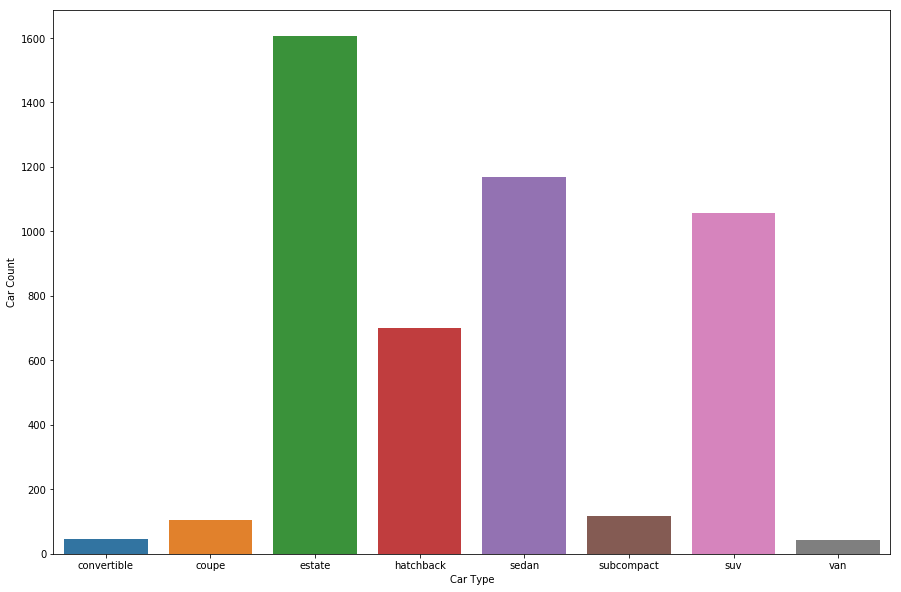

In [9]:
plt.figure(figsize=(15,10))
sns.countplot(data['car_type'])
plt.xlabel("Car Type")
plt.ylabel("Car Count")
plt.show()

### Sold Date Visualization

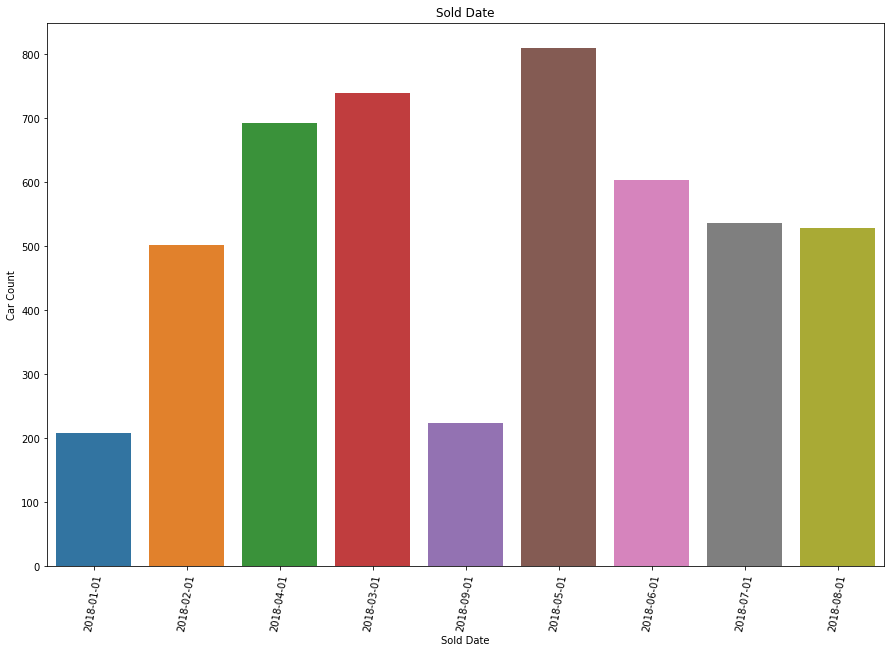

In [10]:
plt.figure(figsize=(15,10))
sns.countplot(data['sold_at'])
plt.xlabel("Sold Date")
plt.ylabel("Car Count")
plt.xticks(rotation=80)
plt.title("Sold Date")
plt.show()

<a id="2"></a>
# Cleaning Data

In [11]:
data.drop(['maker_key','model_key'],axis=1,inplace=True)
data.head()

,mileage,engine_power,registration_date,fuel,paint_color,car_type,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,sold_at
0,140411,100,2012-02-01,diesel,black,convertible,True,True,False,False,True,True,True,False,2018-01-01
1,13929,317,2016-04-01,petrol,grey,convertible,True,True,False,False,False,True,True,True,2018-02-01
2,183297,120,2012-04-01,diesel,white,convertible,False,False,False,False,True,False,True,False,2018-02-01
3,128035,135,2014-07-01,diesel,red,convertible,True,True,False,False,True,True,True,True,2018-02-01
4,97097,160,2014-12-01,diesel,silver,convertible,True,True,False,False,False,True,True,True,2018-04-01


### Registration Date

Registration date is important in terms of learning the age of car. We should bring this information to status that it can use. I divided them into 3. I gave a number to every interval. So that I can use it in my model.

In [12]:
data['RegistrationDate'] = [1 if(i>="1990-03-01" and i<"2000-01-01") else 2 if(i>="2000-01-01" and i<"2010-01-01")
                            else 3 for i in data['registration_date']]

### Fuel Type

New or used car, don't matter. While we buy a car, we pay attention to fuel type. We should bring this information ,like registration date, to status that it can use. So that I can use it in my model.

In [13]:
data['fuel'] = data['fuel'].replace("diesel",1)
data['fuel'] = data['fuel'].replace("petrol",2)
data['fuel'] = data['fuel'].replace("hybrid_petrol",3)
data['fuel'] = data['fuel'].replace("electro",4)

### Color Type

How is your relationship with color? I think you love colors. So that, I should add my model it.

In [14]:
data['paint_color'] = data['paint_color'].replace("black",1)
data['paint_color'] = data['paint_color'].replace("grey",2)
data['paint_color'] = data['paint_color'].replace("white",3)
data['paint_color'] = data['paint_color'].replace("red",4)
data['paint_color'] = data['paint_color'].replace("silver",5)
data['paint_color'] = data['paint_color'].replace("blue",6)
data['paint_color'] = data['paint_color'].replace("orange",7)
data['paint_color'] = data['paint_color'].replace("beige",8)
data['paint_color'] = data['paint_color'].replace("brown",9)
data['paint_color'] = data['paint_color'].replace("green",10)

### Car Type

In [15]:
data['car_type'].unique()
data['car_type'] = data['car_type'].replace("convertible",1)
data['car_type'] = data['car_type'].replace("coupe",2)
data['car_type'] = data['car_type'].replace("estate",3)
data['car_type'] = data['car_type'].replace("hatchback",4)
data['car_type'] = data['car_type'].replace("sedan",5)
data['car_type'] = data['car_type'].replace("subcompact",6)
data['car_type'] = data['car_type'].replace("suv",7)
data['car_type'] = data['car_type'].replace("van",8)

### Feature Types

In [16]:
data['feature_1'] = data['feature_1'].replace(True,1)
data['feature_1'] = data['feature_1'].replace(False,0)
data['feature_2'] = data['feature_2'].replace(True,1)
data['feature_2'] = data['feature_2'].replace(False,0)
data['feature_3'] = data['feature_3'].replace(True,1)
data['feature_3'] = data['feature_3'].replace(False,0)
data['feature_4'] = data['feature_4'].replace(True,1)
data['feature_4'] = data['feature_4'].replace(False,0)
data['feature_5'] = data['feature_5'].replace(True,1)
data['feature_5'] = data['feature_5'].replace(False,0)
data['feature_6'] = data['feature_6'].replace(True,1)
data['feature_6'] = data['feature_6'].replace(False,0)
data['feature_7'] = data['feature_7'].replace(True,1)
data['feature_7'] = data['feature_7'].replace(False,0)
data['feature_8'] = data['feature_8'].replace(True,1)
data['feature_8'] = data['feature_8'].replace(False,0)

### Sold Date

In [17]:
data['SoldAt'] =[1 if(i=="2018-01-01") else 2 if(i=="2018-02-01") else 3 if(i=="2018-03-01")
                 else 4 if(i=="2018-04-01") else 5 if(i=="2018-05-01") else 6 if(i=="2018-06-01")
                 else 7 if(i=="2018-07-01") else 8 if(i=="2018-08-01")
                 else 9 if(i=="2018-09-01") else 0 for i in data['sold_at']]

In [18]:
data.drop(['registration_date','sold_at'],axis=1,inplace=True)
data.head()

,mileage,engine_power,fuel,paint_color,car_type,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,RegistrationDate,SoldAt
0,140411,100,1,1,1,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,3,1
1,13929,317,2,2,1,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,3,2
2,183297,120,1,3,1,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,3,2
3,128035,135,1,4,1,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,3,2
4,97097,160,1,5,1,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,3,4


<a id="3"></a>
# Prediction

In [71]:
#test split
data_score = []
data_price = price.values.reshape(-1,1)
x_train, x_test, y_train, y_test = train_test_split(data,data_price,test_size=0.2,random_state=42)

## Gradient Boosting

The best params 

{'learning_rate': 0.1, <br/>
 'max_depth': 4,    <br/>
 'min_samples_leaf': 15,  <br/>
 'min_samples_split': 2,  <br/>
 'n_estimators': 100}  <br/>

In [76]:
#num_estimators = [100,500,1000]
#learn_rates = [0.1, 0.5, 1]
#max_depths = [1, 2, 3, 4]
#min_samples_leaf = [5,10,15]
#min_samples_split = [2,5,10]

#param_grid = {'n_estimators': num_estimators,
#             'learning_rate': learn_rates,
#              'max_depth': max_depths,
#              'min_samples_leaf': min_samples_leaf,
#              'min_samples_split': min_samples_split}

#grid_search = GridSearchCV(GradientBoostingRegressor(loss='huber'),
#                           param_grid, cv=3, return_train_score=True)
#grid_search.fit(x_train, y_train)

#grid_search.best_params_  

# Create Model
gb = GradientBoostingRegressor(min_samples_leaf= 15, min_samples_split=2, learning_rate=0.1, max_depth=4, n_estimators=100)
gb.fit(x_train,y_train)
y_gb = gb.predict(data)
# Calculate R Square
print(gb.score(x_test,y_test))
data_score.append(gb.score(x_test,y_test))

/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7771161327930548


## Random Forest

In [73]:
# Create Model
reg = RandomForestRegressor(n_estimators=50, random_state = 42) # determine tree count and random data count
reg.fit(x_train,y_train) # create model

# Calculate R Square
print("R Square Value :",reg.score(x_test,y_test))#Evaluation algorithm, If it is close to 1, Model is so good.
data_score.append(reg.score(x_test,y_test))

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


R Square Value : 0.7482078667963683


## Decision Tree

In [74]:
# Create Model
reg = DecisionTreeRegressor()
reg.fit(x_train,y_train)

# Calculate R Square
print("R Square Value :",reg.score(x_test,y_test))
data_score.append(reg.score(x_test,y_test))

R Square Value : 0.5856332068202618


<a id="4"></a>
# Evaluation Regression Models 

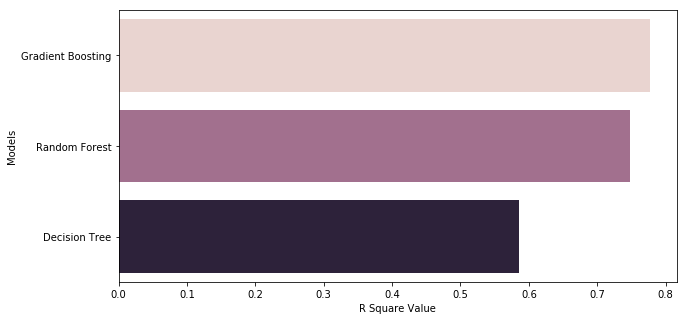

In [75]:
model_name = ['Gradient Boosting','Random Forest','Decision Tree']
plt.figure(figsize=(10,5))
sns.barplot(x=data_score,y=model_name,palette = sns.cubehelix_palette(len(data_score)))
plt.xlabel("R Square Value")
plt.ylabel("Models")
plt.show()

In [77]:
#set the output as a dataframe and convert to csv file named submission.csv
output = pd.DataFrame({ 'Model' : m_key, 'Price': y_gb})
output.to_csv('submission.csv', index=False)